# Bike sharing model evaluation

## Exercise: Load train/test sets

> **Exercise**: Load the train/test sets into the `train_df`/`test_df` DataFrames. Create the x/y Numpy arrays from the `temp` and `users` columns. Plot the data points.

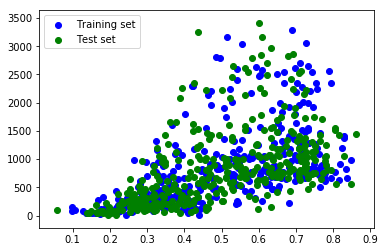

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# Load data sets
train_df = pd.read_csv('data/bike-sharing-train.csv')
test_df = pd.read_csv('data/bike-sharing-test.csv')

# Create x/y Numpy arrays
x_tr = train_df['temp']
y_tr = train_df['users']

x_te = test_df['temp']
y_te = test_df['users']

# Plot data points
plt.scatter(x_tr, y_tr, color="blue", label="Training set")
plt.scatter(x_te, y_te, color="green", label="Test set")
plt.legend()
plt.show()

In [2]:
train_df.head()

,temp,users
0,0.368,1603
1,0.700,768
2,0.282,424
3,0.335,231
4,0.398,663


 ## Exercise: Fit and compare different models

> **Exercise**: (A) Fit several models to the train data and evaluate their performance on the test set using MAE. (B) Remove the outliers with the z-scores. (C) Create a baseline model and do a final model comparison using a bar chart.

Some ideas: Linear regression, polyfit with different degrees, linear regression with Huber loss, linear regression without outliers, polyfit without outliers.

In [5]:
# Define the MAE cost function
def MAE(y, y_pred):
    return np.mean(np.abs(y - y_pred))

In [25]:
# (A) Test different models
from sklearn.linear_model import SGDRegressor

# Huber Model
lm_huber = SGDRegressor(loss='huber', penalty='none', epsilon=1, max_iter=10000)
lm1 = lm_huber.fit(x_tr[:, np.newaxis], y_tr)

# Square loss model
lm_squared = SGDRegressor(loss='squared_loss', penalty='none', max_iter=10000)
lm2 = lm_squared.fit(x_tr[:, np.newaxis], y_tr)

# Polyfit with one degree
coefs_lm3 = np.polyfit(x_tr, y_tr, deg=1)

# Two degree
coefs_lm4 = np.polyfit(x_tr, y_tr, deg=2)

# Square loss with outliers removed
z_score = (x_tr - x_tr.mean()) / x_tr.std()
z_score.head()
x_tr_filtered = x_tr[np.abs(z_score) < 3]
y_tr_filtered = y_tr[np.abs(z_score) < 3]
lm_squared2 = SGDRegressor(loss='squared_loss', penalty='none', max_iter=10000)
lm3 = lm_squared2.fit(x_tr_filtered[:, np.newaxis], y_tr_filtered)

In [15]:
# (B) Remove outliers
#???

In [17]:
from sklearn.dummy import DummyRegressor

# Create the DummyRegressor object
dummy = DummyRegressor(strategy='mean')
dummy.fit(x_tr[:, np.newaxis], y_tr)

DummyRegressor(constant=None, quantile=None, strategy='mean')

In [22]:
pred_baseline = dummy.predict(x_te[:, np.newaxis])
mae_baseline = MAE(y_te, pred_baseline)

In [27]:
pred1 = lm_huber.predict(x_te[:, np.newaxis])
pred2 = lm_squared.predict(x_te[:, np.newaxis])
pred3 = np.polyval(coefs_lm3, x_te)
pred4 = np.polyval(coefs_lm4, x_te)
pred5 = lm_squared2.predict(x_te[:, np.newaxis])

In [28]:
mae1 = MAE(y_te, pred1)
mae2 = MAE(y_te, pred2)
mae3 = MAE(y_te, pred3)
mae4 = MAE(y_te, pred4)
mae5 = MAE(y_te, pred5)

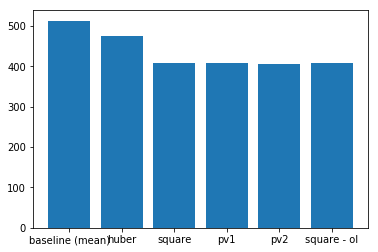

In [29]:
plt.bar([1, 2, 3, 4, 5, 6], [mae_baseline, mae1, mae2, mae3, mae4, mae5])
plt.xticks([1, 2, 3, 4, 5, 6], ['baseline (mean)', 'huber', 'square', 'pv1','pv2', 'square - ol'])
plt.show()

In [30]:
print(mae1)
print(mae2)
print(mae3)
print(mae4)
print(mae5)

475.963649311
408.640725696
408.822638215
406.667019946
408.769366707


In [ ]:
# (C) Final comparison
???